In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification, make_blobs

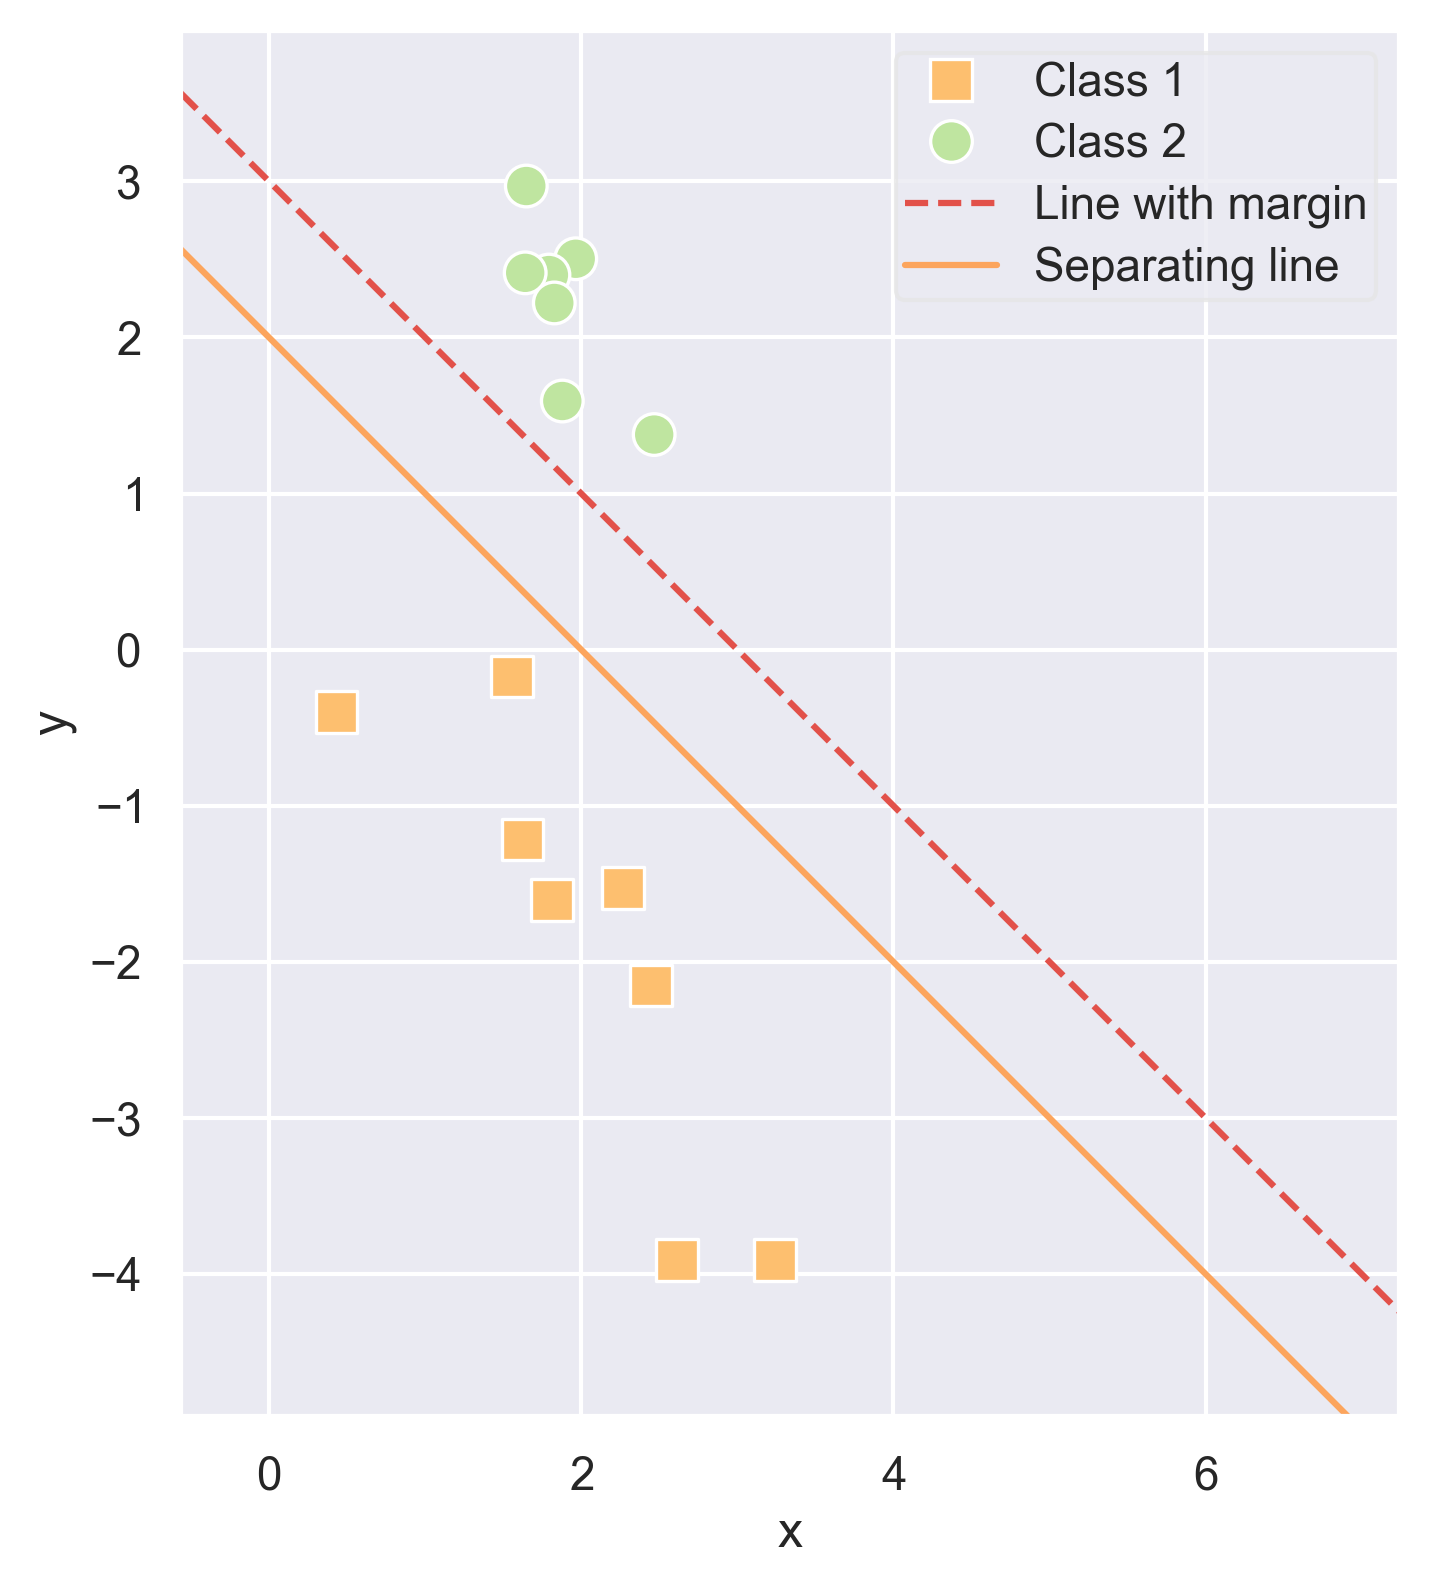

In [46]:
# Generate data points using make_classification
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=15, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, class_sep=2, random_state=42)

data = pd.DataFrame({
    'x': X[:, 0],
    'y': X[:, 1],
    'class': ['Class 1' if label == 0 else 'Class 2' for label in y]
})

# Create a beautiful seaborn plot
sns.set(style='darkgrid', palette='Spectral', color_codes=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='x', y='y', hue='class', style='class', markers={'Class 1': 's', 'Class 2': 'o'}, palette="Spectral", s=100) # type: ignore

w = -1
b = 3

# Draw a separating line
x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 4, 100)
sns.lineplot(x=x, y=w*x+b,  linestyle='--', label='Line with margin')  # Line with margin
sns.lineplot(x=x, y=w*x+b - 1, label='Separating line')  # Separating line

# Set limits and show plot
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 4)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.gca().set_aspect('equal', adjustable='box')
# plt.legend()
# plt.title('Seaborn Scatter Plot with Separating Line')
plt.show()

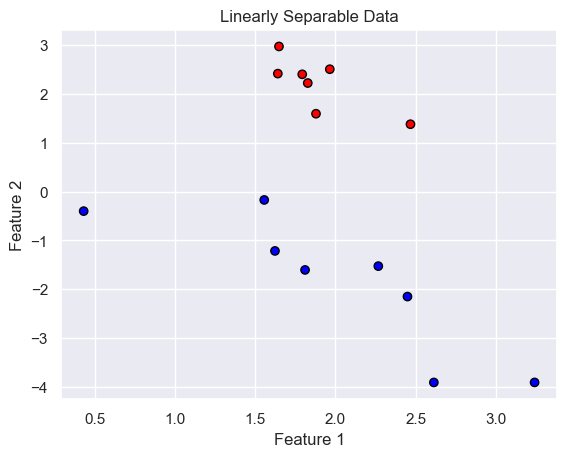

In [23]:
X, y = make_classification(n_samples=15, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, class_sep=2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()

In [24]:
X, y = make_classification(n_samples=20, n_features=2, n_redundant=0, n_informative=2, 
                           n_clusters_per_class=1, class_sep=2)

In [25]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

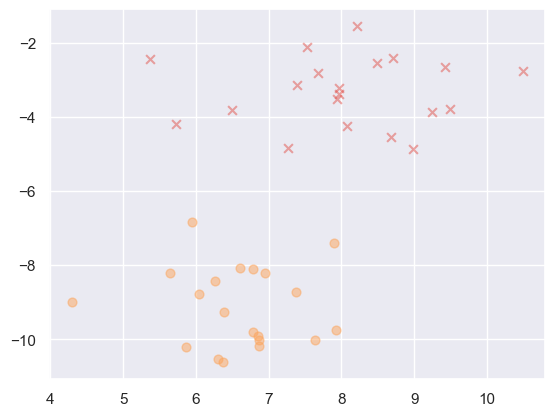

In [26]:
markers = ['x', 'o']  # Different markers for each class
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=40, marker=markers[i], alpha=.5)
plt.show()

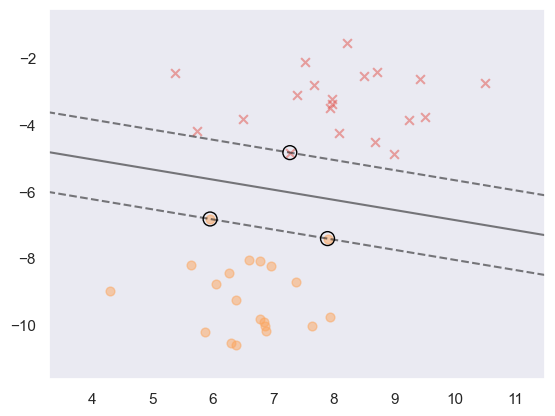

In [2]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

sns.set(style='dark', palette='Spectral', color_codes=True)
markers = ['x', 'o']  # Different markers for each class
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=40, marker=markers[i], alpha=.5)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

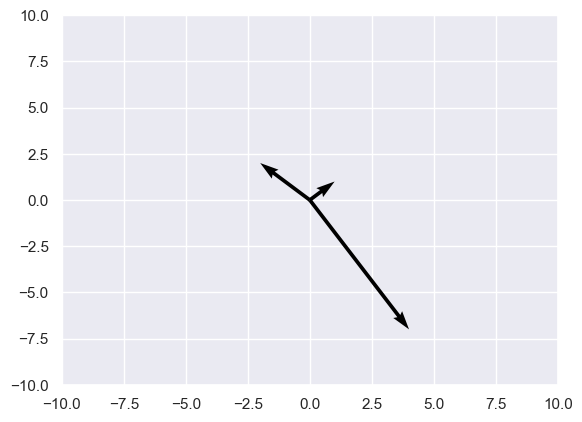

In [28]:
sns.set(style='darkgrid', palette='Spectral', color_codes=True)
plt.quiver([0, 0, 0],
           [0, 0, 0],
           [1, -2, 4],
           [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [29]:
arr = [2,3]
txt = "Vector X"
ax.annotate(txt, arr)
ax.arrow(0, 0, *arr, head_width=0.05, head_length=0.1)

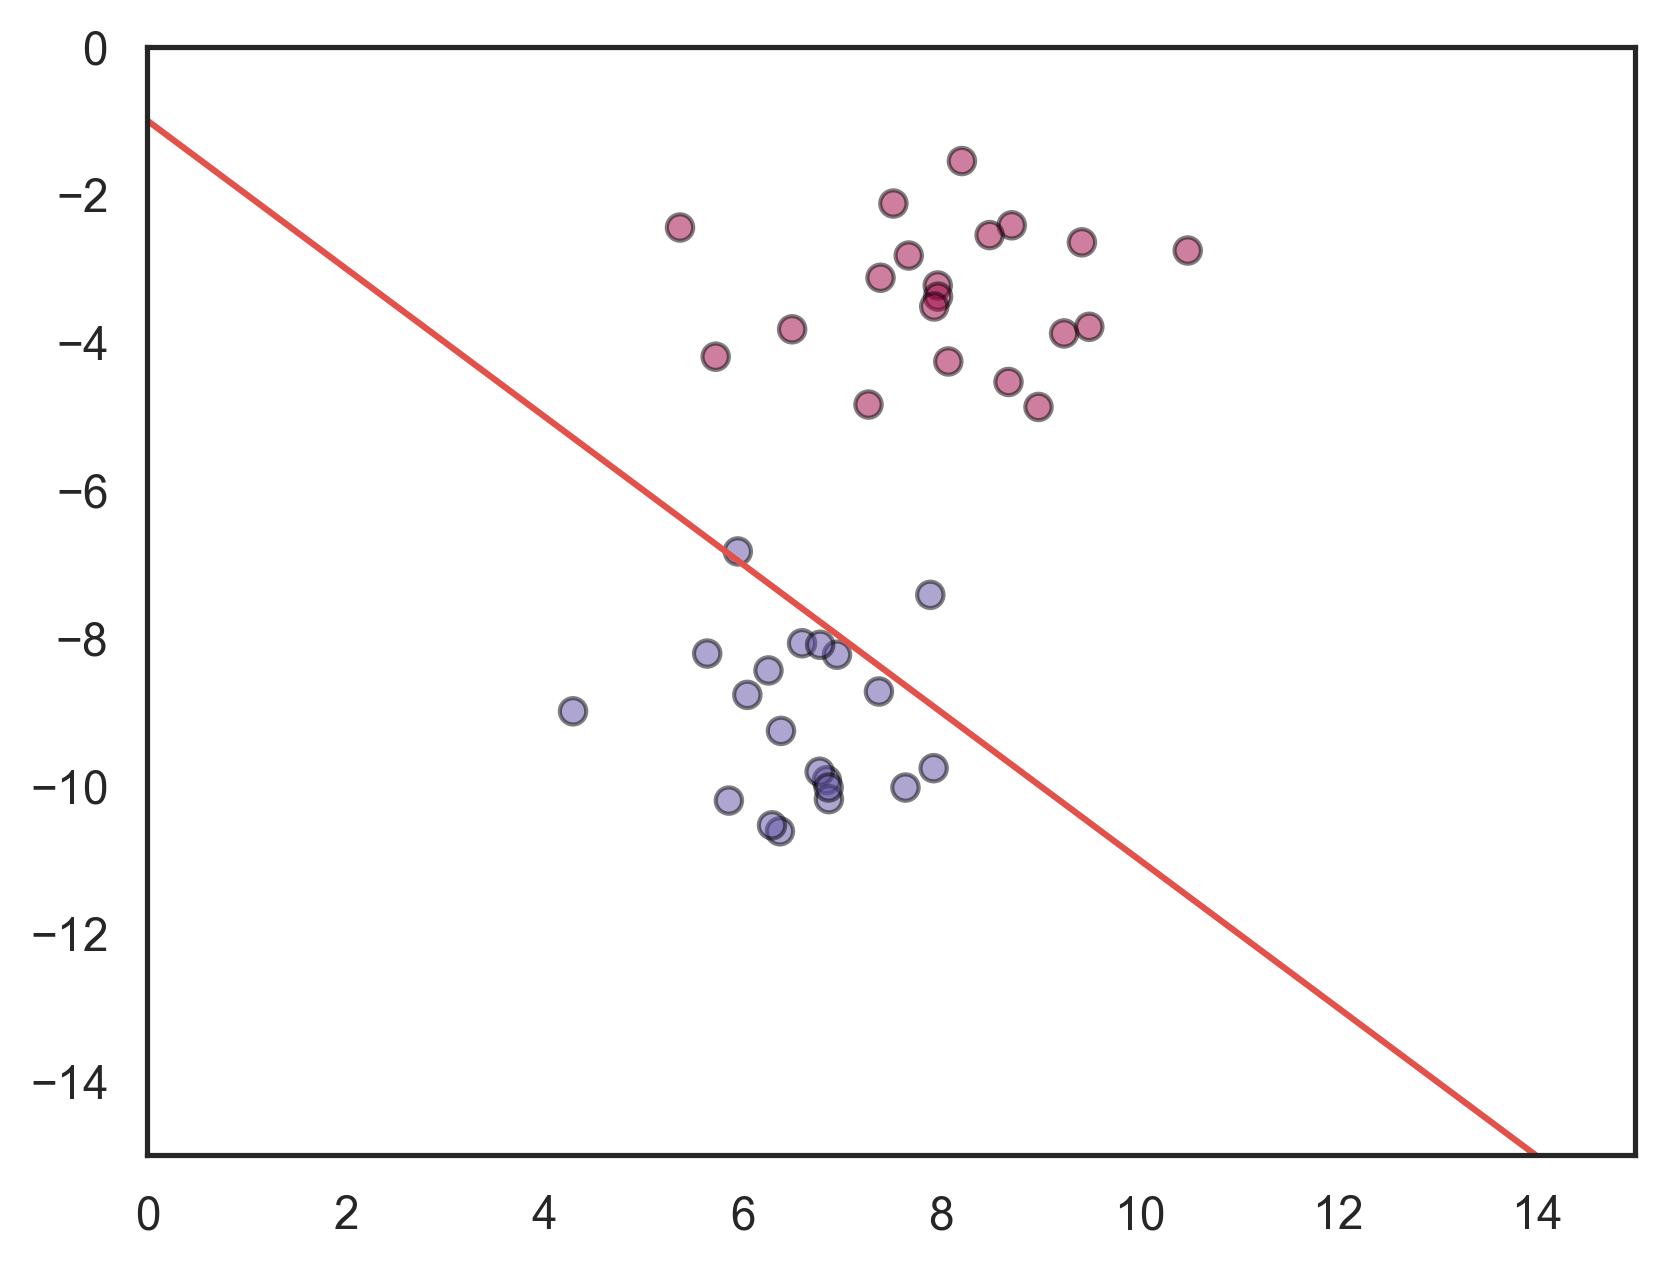

In [49]:
w = -1
b = -1
x = np.linspace(0, 30, 10)  # Adjusted x range to match the limits

arr = [150, 120]  # Define arr
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# Ensure blobs are displayed correctly
# plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o', alpha=0.5, cmap='Spectral')

ax = plt.gca()
ax.plot(x, w*x + b)
# ax.quiver(0, 0, arr[0], arr[1], angles='xy', scale_units='xy', scale=1)
# ax.annotate("$\\vec{x}$", (arr[0], arr[1]))  # Ensure arr is unpacked correctly
plt.xlim(0, 15)
plt.ylim(-15, 0)
plt.show()


In [50]:
import ipywidgets
from ipywidgets import interact
import numpy as np 
import matplotlib.pyplot as plt

In [51]:
def plot_poly(n=1):
   plt.figure(figsize=(5,5))
   x = np.linspace(-10, 10, 1000)
   plt.plot(x, x**n)
   plt.ylim(-50, 50)
   plt.show()

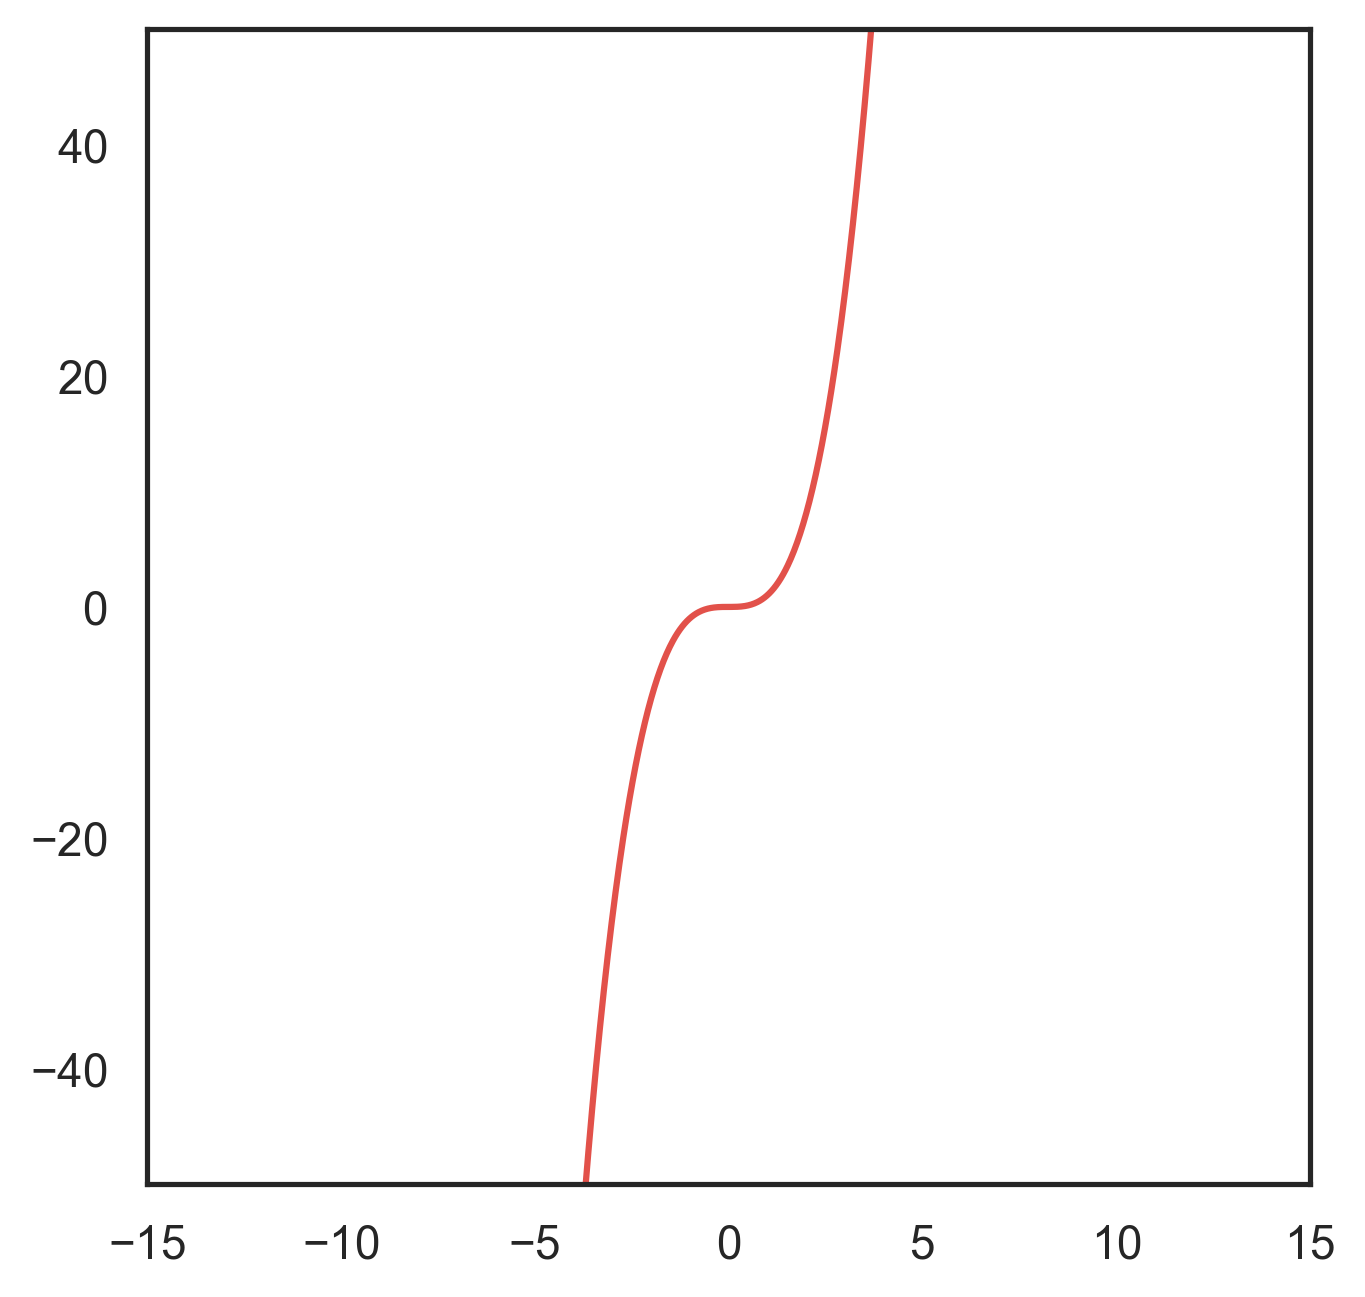

In [52]:
plot_poly(3)

In [53]:
ipywidgets.interact(plot_poly, n=ipywidgets.IntSlider(min=0, max=15, step=1, value=3));

interactive(children=(IntSlider(value=3, description='n', max=15), Output()), _dom_classes=('widget-interact',…

In [54]:
def find_perpendicular_point(m, b, x1, y1):
    # Calculate the x-coordinate of the intersection point
    x2 = (x1 + m * (y1 - b)) / (m**2 + 1)
    
    # Calculate the y-coordinate of the intersection point
    y2 = m * x2 + b
    
    return x2, y2

In [55]:
sns.set(style='white', palette='Spectral', color_codes=True)

@interact(w=(-5,5,.1), b=(-5,5,.1))
def plt_line(w, b):
    x = np.linspace(0, 30, 10)
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o', alpha=0.5, cmap='Spectral')

    ax = plt.gca()
    ax.plot(x, w * x + b, color='teal')  # Added color to the line

    # Draw vector (arrow) from line to a specific point
    for point in X[16:17]:  # Iterate over the data points
        x0 = point[0]
        y0 = point[1]
        y_line = w * x0 + b  # Calculate the corresponding y value on the line
        x1, y1 = find_perpendicular_point(w, b, x0, y0)
        plt.annotate('', xy=(x0, y0), xytext=(x1, y1),
                     arrowprops=dict(facecolor='grey', shrink=.1))
        plt.text(x0, y0, "$\\vec{x}$", color='navy', fontsize=12)
        plt.text(x1-(x1-x0)/2 + .2, y1-(y1-y0)/2 - .45, "$\\vec{d}$", color='navy', fontsize=12)
        plt.text(x1, y1-.7, "$\\vec{x_p}$", color='navy', fontsize=12)
        plt.scatter(x1,y1, s=40, marker='o', alpha=1, c='navy')
    plt.annotate('', xy=(12, -6), xytext=find_perpendicular_point(w, b, 12, -6),
                     arrowprops=dict(facecolor='pink', shrink=0)) 
    plt.text(12, -6, "$\\vec{w}$", color='crimson', fontsize=12)
    
    # ax.set_xticklabels([])
    # ax.set_yticklabels([])

    plt.xlim(0, 15)
    plt.ylim(-15, 0)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

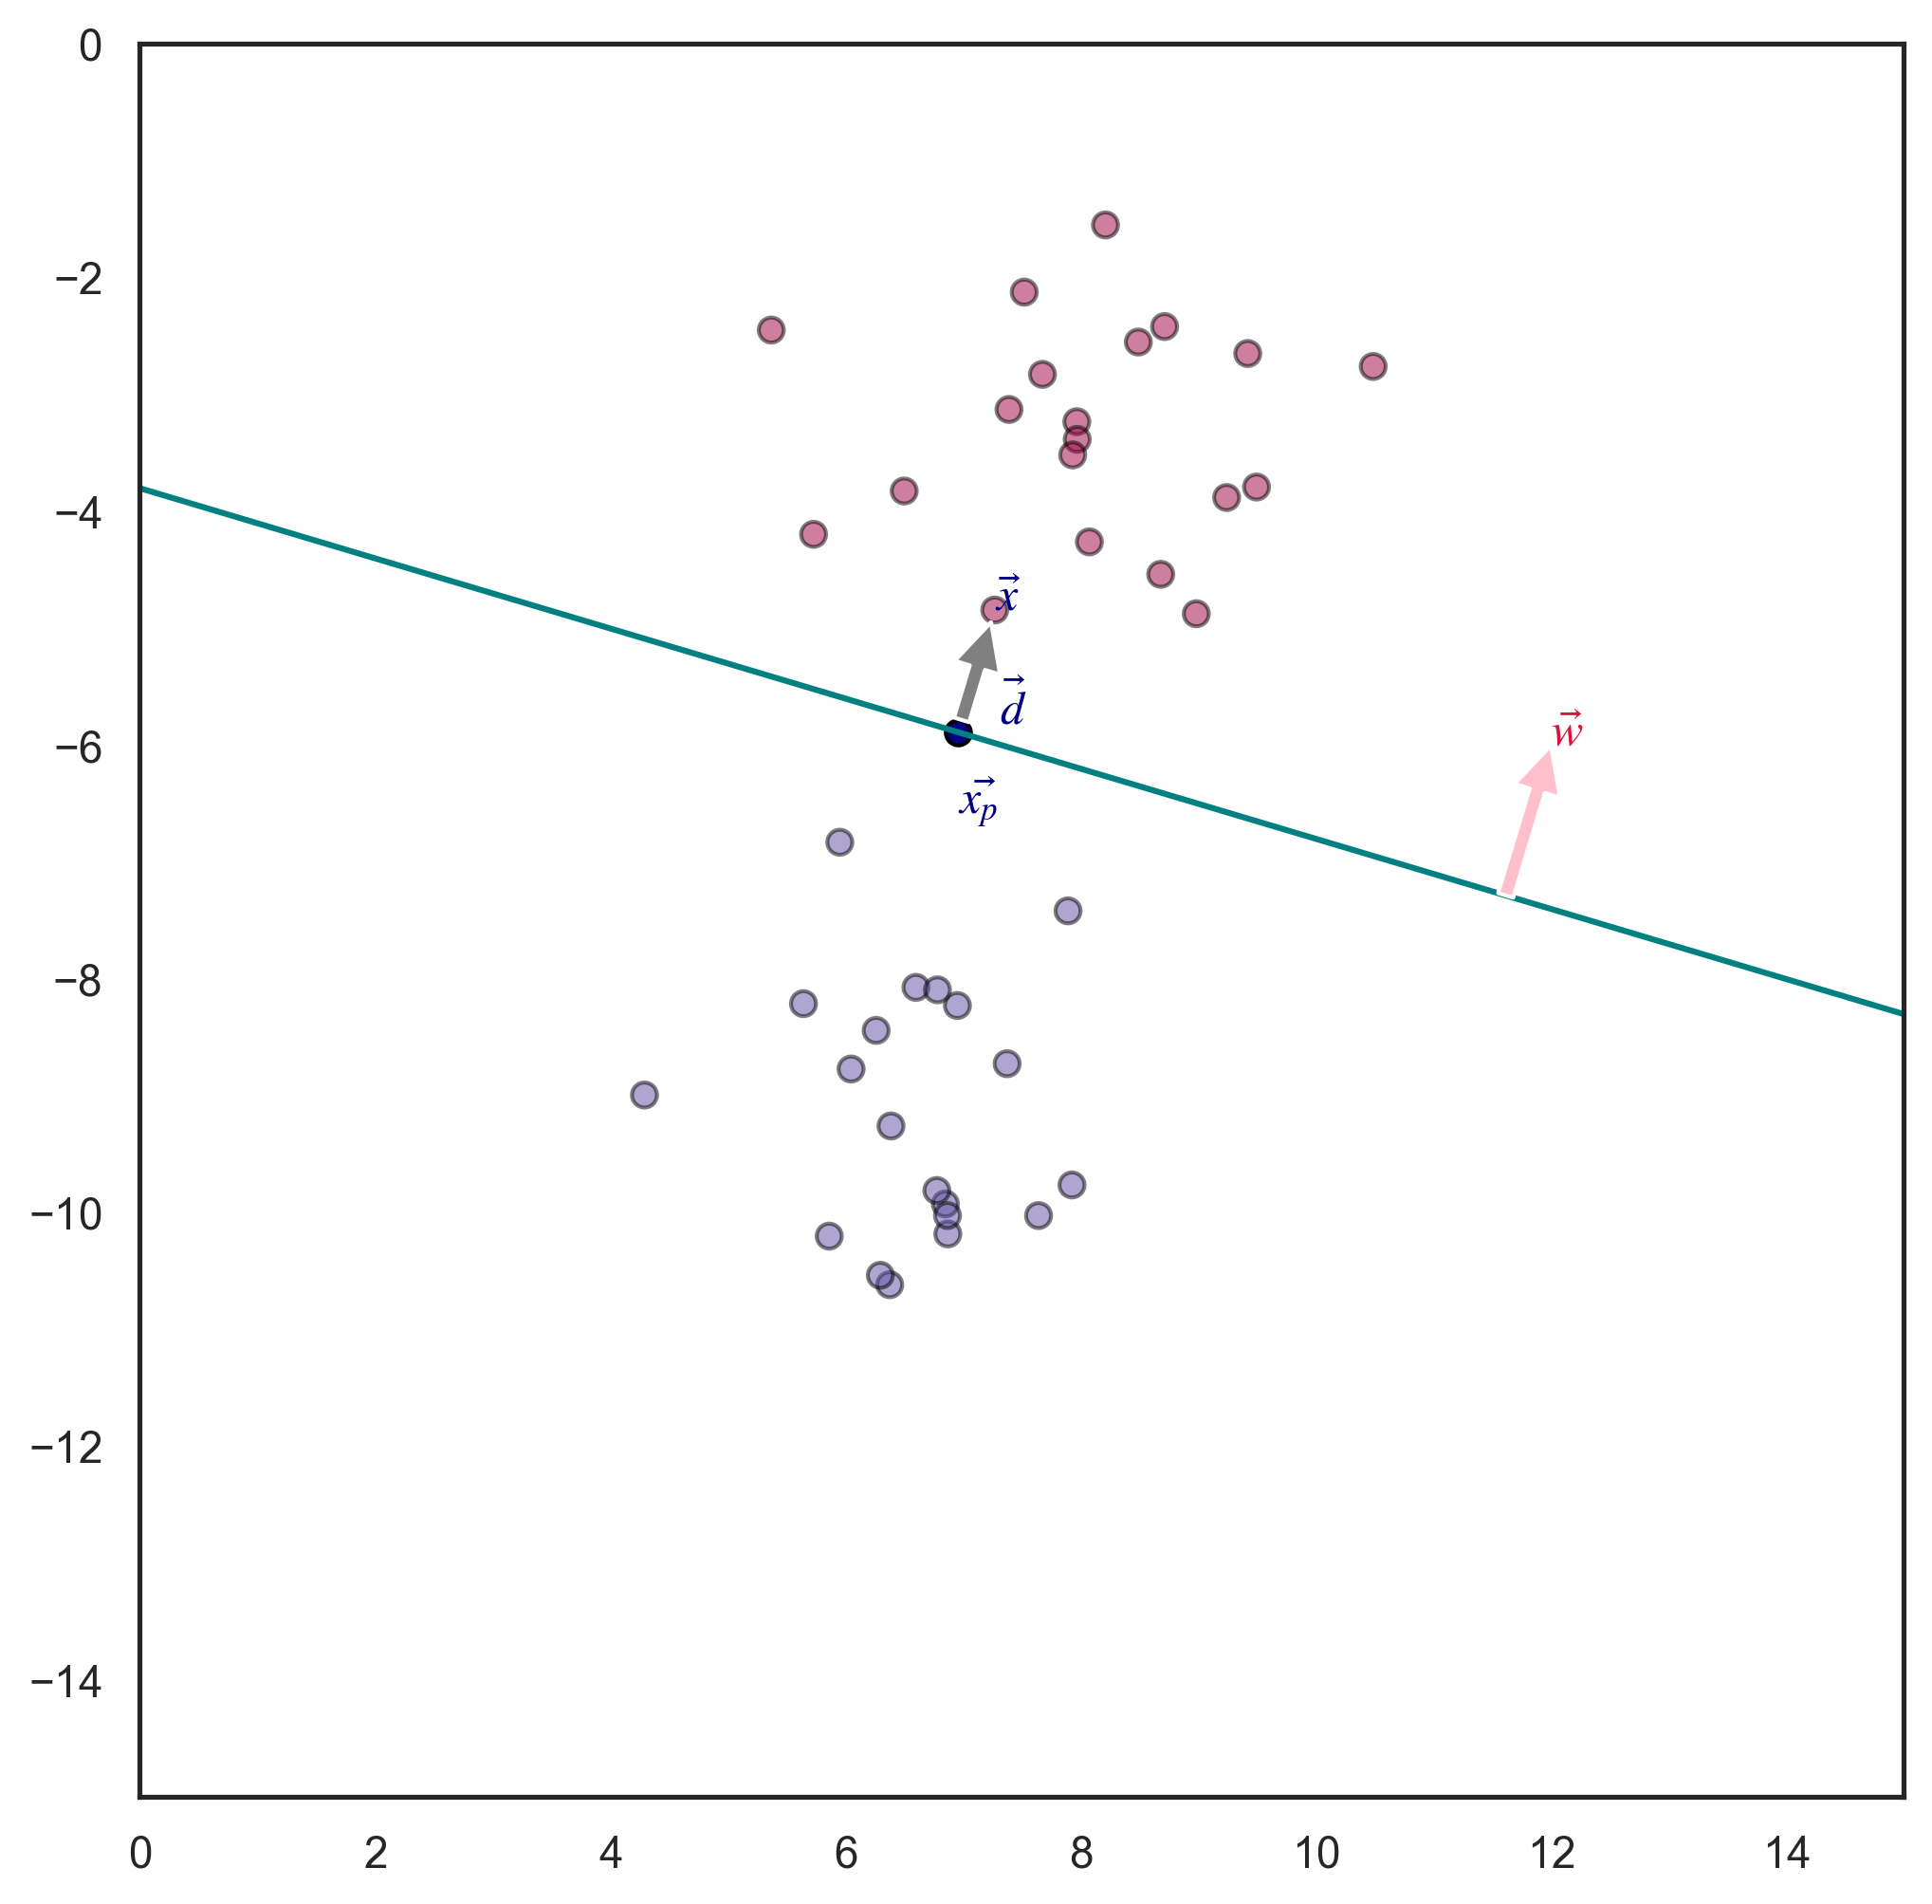

In [56]:
plt_line(-0.30, -3.80)

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
plt.style.use('plot_style.txt')

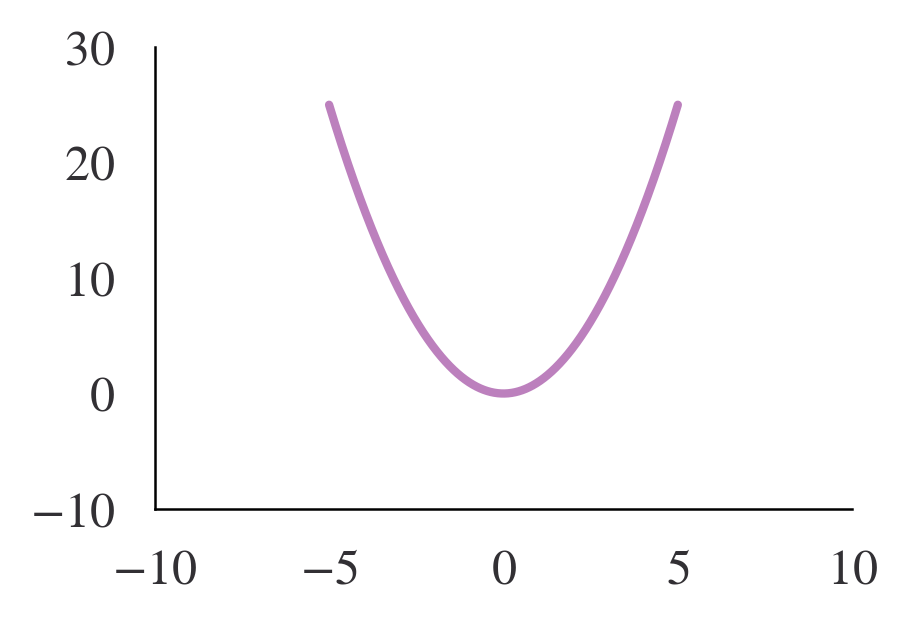

In [26]:
x = np.linspace(-5,5, 1000)
y = x**2
plt.figure(figsize=(3,2))
plt.plot(x,y)
plt.show()

In [57]:
import agi

In [65]:
agi.calculate_agi(100,58)

42